In [1]:
import pandas as pd 

In [2]:
data=pd.read_csv('iris.csv')

In [3]:
print(data.head()) #look the variables and identify which are all numerical and cat var

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
print(data.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [5]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
#EDA

In [6]:
# scatter plot using pandas

ax = data[data['species']=='setosa'].plot.scatter(x='sepal_length', y='sepal_width', 
                                                    color='red', label='setosa')
data[data['species']=='versicolor'].plot.scatter(x='sepal_length', y='sepal_width', 
                                                color='green', label='versicolor', ax=ax)
data[data['species']=='virginica'].plot.scatter(x='sepal_length', y='sepal_width', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

Text(0.5, 1.0, 'scatter')

C:\Users\Sajin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


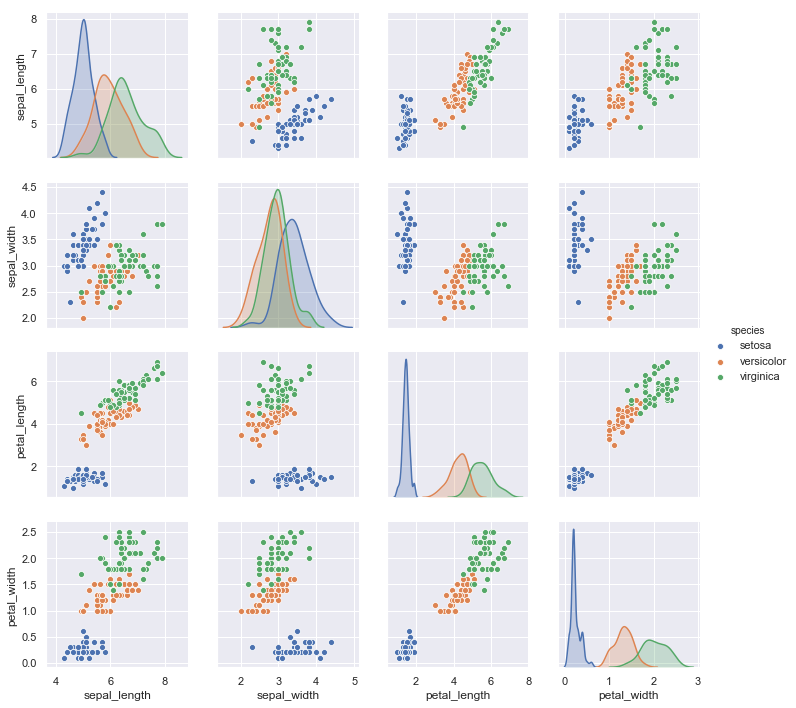

In [7]:
#paired plot using Sns
import seaborn as sns
sns.set()
sns.pairplot(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']],
             hue="species")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D4DA364A8>,
      dtype=object)

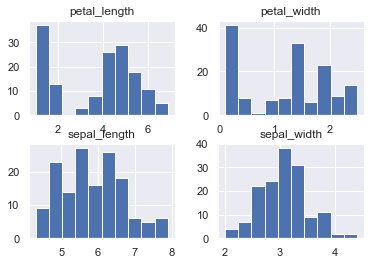

In [8]:
data.hist()

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
encode= LabelEncoder()
#data.species= encode.fit_transform(data.species)
data.species= encode.fit_transform(data['species'])

In [11]:
print(data.head(55))

    sepal_length  sepal_width  petal_length  petal_width  species
0            5.1          3.5           1.4          0.2        0
1            4.9          3.0           1.4          0.2        0
2            4.7          3.2           1.3          0.2        0
3            4.6          3.1           1.5          0.2        0
4            5.0          3.6           1.4          0.2        0
5            5.4          3.9           1.7          0.4        0
6            4.6          3.4           1.4          0.3        0
7            5.0          3.4           1.5          0.2        0
8            4.4          2.9           1.4          0.2        0
9            4.9          3.1           1.5          0.1        0
10           5.4          3.7           1.5          0.2        0
11           4.8          3.4           1.6          0.2        0
12           4.8          3.0           1.4          0.1        0
13           4.3          3.0           1.1          0.1        0
14        

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train,test= train_test_split(data, test_size=0.2, random_state=0)

In [14]:
print("Shape of train set", train.shape)

Shape of train set (120, 5)


In [15]:
print("Shape of test set", test.shape)

Shape of test set (30, 5)


In [16]:
train_x= train.drop(columns=['species'], axis=1)
train_y= train['species']

In [17]:
print(train_x.head(10))

     sepal_length  sepal_width  petal_length  petal_width
137           6.4          3.1           5.5          1.8
84            5.4          3.0           4.5          1.5
27            5.2          3.5           1.5          0.2
127           6.1          3.0           4.9          1.8
132           6.4          2.8           5.6          2.2
59            5.2          2.7           3.9          1.4
18            5.7          3.8           1.7          0.3
83            6.0          2.7           5.1          1.6
61            5.9          3.0           4.2          1.5
92            5.8          2.6           4.0          1.2


In [18]:
test_x= test.drop(columns=["species"], axis=1)
test_y= test['species']

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
model=LogisticRegression()

In [21]:
model.fit(train_x, train_y)

C:\Users\Sajin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sajin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
predict=model.predict(test_x)
predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0])

In [23]:
print("Predicted value on the test data", encode.inverse_transform(predict))

Predicted value on the test data ['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'virginica' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa']


In [24]:
print("Accuracy:")
print(accuracy_score(test_y, predict))

Accuracy:
0.9666666666666667
